In [67]:
import sys

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

import numpy as np

from pooledQTL import deconvolve, beta_model, gaussian_model, io_utils, asb_data

from importlib import reload

from pathlib import Path

In [68]:
geno = io_utils.loadGenotypes(
    '/gpfs/commons/home/daknowles/pooledRBPs/ariana/all_chr_rmdup.vcf.gz',
    maxlines = None, 
    posterior = False,
    print_every = 1e5,
    add_chr_prefix="").rename(columns = {"SNP" : "variantID"})
geno.head()

KeyboardInterrupt: 

In [69]:
counts = pd.read_csv(
    '/gpfs/commons/home/daknowles/pooledRBPs/ariana/uniq_notDup_rmBL_waspfiltered_allelic_out.txt', 
    sep = "\t", 
    usecols = range(8), 
    index_col = False
)


In [20]:
geno

,position,contig,variantID,refAllele,altAllele,GSA3_195_NYUMD0079-01,GSA4_6_NYUMD0117-01,GSA4_73_NYUMD0116-01,GSA6_8_NYUMD0179-01,GSA6_22_NYUMD0177-01,GSA6_54_NYUMD0149-01,GSA6_112_BIMD0195-01,GSA6_143_BIMD0173-01,GSA6_173_NYUMD0183-01,GSA6_215_NYUMD0186-01
chr1:10894:G:A,10894,chr1,chr1:10894:G:A,G,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr1:13082:C:G,13082,chr1,chr1:13082:C:G,C,G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr1:13306:G:A,13306,chr1,chr1:13306:G:A,G,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr1:13973:T:C,13973,chr1,chr1:13973:T:C,T,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr1:14003:C:T,14003,chr1,chr1:14003:C:T,C,T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr22:50807024:GCGCCACCCC:G,50807024,chr22,chr22:50807024:GCGCCACCCC:G,GCGCCACCCC,G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr22:50807608:T:C,50807608,chr22,chr22:50807608:T:C,T,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr22:50807707:T:C,50807707,chr22,chr22:50807707:T:C,T,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr22:50807781:C:T,50807781,chr22,chr22:50807781:C:T,C,T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
counts

,contig,position,variantID,refAllele,altAllele,refCount,altCount,totalCount
0,chr1,13306,chr1:13306:G:A,G,A,4,0,4
1,chr1,96584,chr1:96584:A:C,A,C,7,0,7
2,chr1,133872,chr1:133872:C:A,C,A,6,0,6
3,chr1,181462,chr1:181462:G:A,G,A,12,0,12
4,chr1,197092,chr1:197092:T:C,T,C,5,0,5
...,...,...,...,...,...,...,...,...
5419496,chr22,50795633,chr22:50795633:A:G,A,G,7,0,7
5419497,chr22,50799890,chr22:50799890:A:T,A,T,2,0,2
5419498,chr22,50799900,chr22:50799900:A:C,A,C,2,0,2
5419499,chr22,50801158,chr22:50801158:T:G,T,G,5,0,5


sum(w)=0.918247 ideally would be 1


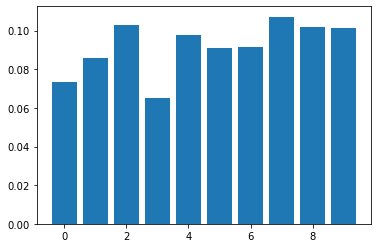

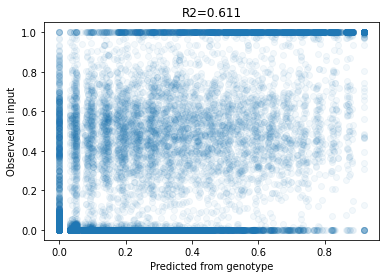

In [73]:
w = deconvolve.deconvolve(
    geno, 
    counts, 
    sample_inds = range(5,15), 
    total_thres = 100, 
    plot = True
)

(array([46628672.,  2003250.,        0.,   930347.,   651544.,        0.,
          523346.,   435259.,        0.,   381029.,   335982.,        0.,
          299630.,   271453.,        0.,   248057.,   228859.,        0.,
          208862.,   193415.,        0.,   173354.,   164349.,        0.,
          151458.,   137907.,        0.,   127203.,   126809.,   232877.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

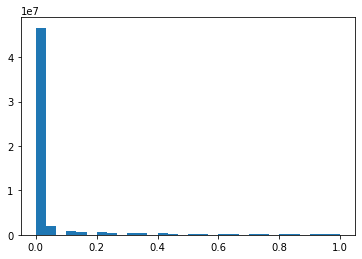

In [34]:
x = geno.iloc[:,5:].to_numpy()
maf = x.mean(1)
_ = plt.hist(maf,30)

In [38]:
geno_maf5 = geno.iloc[maf>=0.05,:]

sum(w)=0.918247 ideally would be 1


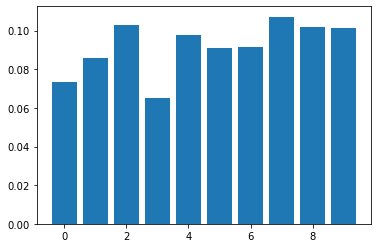

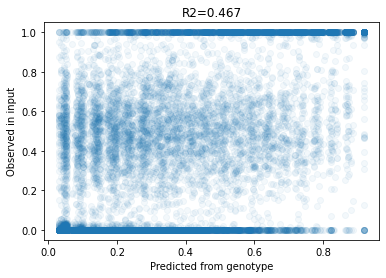

In [74]:
w = deconvolve.deconvolve(
    geno_maf5,
    counts, 
    sample_inds = range(5,15), 
    total_thres = 100, 
    plot = True
)

In [42]:
x = geno_maf5.iloc[:,5:].to_numpy()
maf = x.mean(1)

In [70]:
merged = geno_maf5.merge(counts, on = ["variantID", "refAllele", "altAllele", "contig", "position"]) # should we also join on contig? 


In [76]:
merged["maf"] = merged.iloc[:,5:15].to_numpy().mean(1)

Text(0, 0.5, 'AF in IP')

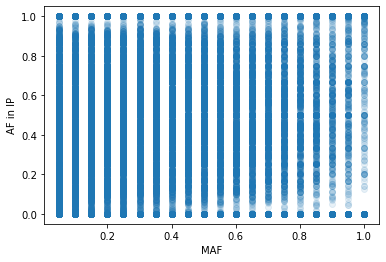

In [77]:
plt.scatter(merged.maf, merged.altCount / merged.totalCount, alpha = 0.1)
plt.xlabel("MAF")
plt.ylabel("AF in IP")

(array([9.14260e+04, 1.01183e+05, 0.00000e+00, 1.03654e+05, 9.60440e+04,
        1.45724e+05, 8.06540e+04, 4.03660e+04, 2.82870e+04, 1.43160e+04,
        1.25520e+04, 6.98900e+03, 6.10900e+03, 4.31100e+03, 3.69400e+03,
        2.70700e+03, 1.85800e+03, 1.44200e+03, 1.07200e+03, 7.50000e+02,
        5.45000e+02, 3.47000e+02, 2.47000e+02, 1.67000e+02, 8.80000e+01,
        5.30000e+01, 2.80000e+01, 6.00000e+00, 5.00000e+00, 3.00000e+00]),
 array([0.30103   , 0.39607194, 0.49111389, 0.58615583, 0.68119778,
        0.77623972, 0.87128167, 0.96632361, 1.06136556, 1.1564075 ,
        1.25144945, 1.34649139, 1.44153334, 1.53657528, 1.63161723,
        1.72665917, 1.82170111, 1.91674306, 2.011785  , 2.10682695,
        2.20186889, 2.29691084, 2.39195278, 2.48699473, 2.58203667,
        2.67707862, 2.77212056, 2.86716251, 2.96220445, 3.0572464 ,
        3.15228834]),
 <BarContainer object of 30 artists>)

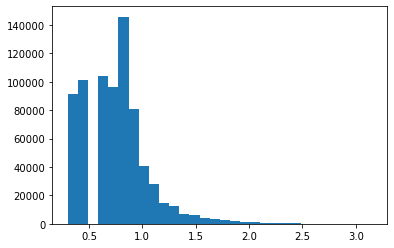

In [81]:
plt.hist(np.log10(merged.totalCount),30)

(array([80950.,   651.,   493.,   588.,   812.,  1267.,  1104.,  1280.,
         1692.,  1385.,  2250.,  1657.,  1246.,  1260.,   820.,   760.,
          769.,   329.,   573., 26056.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

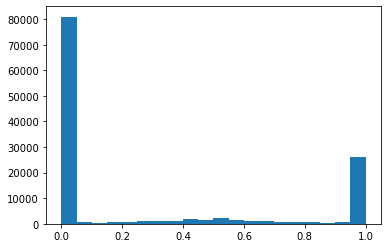

In [84]:
merged10 = merged[merged.totalCount >= 10]
plt.hist(merged10.altCount / merged10.totalCount, 20)

(125942, 19)

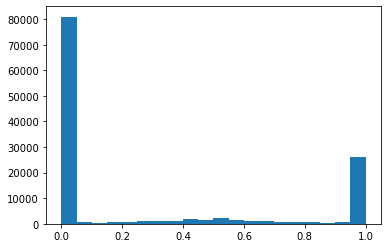

In [85]:
merged30 = merged[merged.totalCount >= 10]
plt.hist(merged30.altCount / merged30.totalCount, 20)
merged30.shape

In [66]:
(merged.totalCount > 100).sum()

3449